In [1]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import fpgrowth, association_rules

from fswe_demo.infra.db.get_conn import get_db_connection

In [2]:
conn = get_db_connection()

In [3]:
# Get data from the db

transaction_df = pd.read_sql_table("int_product_baskets", conn)

In [19]:
transaction_df

,user_id,rated_date,transaction_id,product_basket,basket_size
0,AE22236AFRRSMQIKGG7TPTB75QEA,2015-03-17,AE22236AFRRSMQIKGG7TPTB75QEA_2015-03-17 00:00:00,"[B00M4I1BAY, B08QKWQS9J]",2
1,AE22A55GVSQJJKBIAZRBQHNTKPMQ,2016-01-23,AE22A55GVSQJJKBIAZRBQHNTKPMQ_2016-01-23 00:00:00,"[B006GWO5NE, B00QL1ZN3G]",2
2,AE22A55GVSQJJKBIAZRBQHNTKPMQ,2016-03-18,AE22A55GVSQJJKBIAZRBQHNTKPMQ_2016-03-18 00:00:00,"[B01FMOGIEK, B07WWGYJ8M]",2
3,AE22KJYRAAYX6LZUXXU72HYJRZNA,2016-02-13,AE22KJYRAAYX6LZUXXU72HYJRZNA_2016-02-13 00:00:00,"[B00JQTO8TU, B016MAOS5E, B07193SG3D, B0BK6SGHH...",5
4,AE22KJYRAAYX6LZUXXU72HYJRZNA,2016-08-11,AE22KJYRAAYX6LZUXXU72HYJRZNA_2016-08-11 00:00:00,"[B002DPUUL4, B09TWVB2TH]",2
...,...,...,...,...,...
20414,AHZZM7BCJAF2UEMMBHZCLXBB2SVA,2016-03-02,AHZZM7BCJAF2UEMMBHZCLXBB2SVA_2016-03-02 00:00:00,"[B01CL4CUI2, B0BVH24H94]",2
20415,AHZZNY4I7DJBEGVSPF4Z6L55G7LA,2015-01-03,AHZZNY4I7DJBEGVSPF4Z6L55G7LA_2015-01-03 00:00:00,"[B004CLYJ2I, B00BFDHVAS]",2
20416,AHZZNY4I7DJBEGVSPF4Z6L55G7LA,2015-07-05,AHZZNY4I7DJBEGVSPF4Z6L55G7LA_2015-07-05 00:00:00,"[B001EAQTRI, B0047T79VS]",2
20417,AHZZQT4YA4SJBE5MHHL4NVWKSELQ,2018-04-25,AHZZQT4YA4SJBE5MHHL4NVWKSELQ_2018-04-25 00:00:00,"[B01K8B8YA8, B075X8471B]",2


In [20]:
# Basic EDA
transaction_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20419 entries, 0 to 20418
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   user_id         20419 non-null  object        
 1   rated_date      20419 non-null  datetime64[ns]
 2   transaction_id  20419 non-null  object        
 3   product_basket  20419 non-null  object        
 4   basket_size     20419 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 797.7+ KB


In [4]:
product_baskets_list = transaction_df['product_basket'].tolist()
product_baskets_list

[['B00M4I1BAY', 'B08QKWQS9J'],
 ['B006GWO5NE', 'B00QL1ZN3G'],
 ['B01FMOGIEK', 'B07WWGYJ8M'],
 ['B00JQTO8TU', 'B016MAOS5E', 'B07193SG3D', 'B0BK6SGHHB', 'B0BN74ZJDK'],
 ['B002DPUUL4', 'B09TWVB2TH'],
 ['B00007M1TZ', 'B002Y6CJJ8', 'B003ZX8B2S'],
 ['B00JO6RO8C', 'B01AOODE18'],
 ['B00IVPU786', 'B00Y20UI1K'],
 ['B0032HM6HS', 'B01G8JO5F2'],
 ['B007TISRBK', 'B008RV51EE', 'B083TH1B45'],
 ['B00OQVZDJM', 'B098DXZN3V'],
 ['B00O1RTQJE', 'B072M34RQC', 'B0BN74ZJDK'],
 ['B01LWX4JJH', 'B01LX4CG4N', 'B08X9HYPZJ', 'B09315SB39'],
 ['B005HS4RF4', 'B0B4QS4F25'],
 ['B002J9HBIO', 'B00E9W1ULS', 'B00M7T8T1E', 'B00UAKWFB2', 'B098DSFTQM'],
 ['B00C631EYU', 'B09TC1K4GY'],
 ['B013ALA9LA', 'B0C1J8RZ46'],
 ['B00KQQHFVK', 'B01LW71IBJ'],
 ['B00006B8K2', 'B000MXWSWI', 'B00KAI3KW2', 'B0BB6RBYJ6'],
 ['B00FPAVUHC', 'B083TH1B45'],
 ['B00SFSU53G', 'B01MQWUXZS', 'B075X8471B', 'B07JZT6YMB'],
 ['B01MV2YGRR', 'B0BR6ZF28J'],
 ['B0086YC6JU', 'B0BSFT117F'],
 ['B003ES5ZSW', 'B0067HY7HW'],
 ['B009LGLEFY', 'B00BPO9HOA', 'B00CPJHGTM'],
 

In [5]:
# Encoding the transactions
te = TransactionEncoder()
encoded_transaction_df = pd.DataFrame(te.fit(product_baskets_list).transform(product_baskets_list), columns=te.columns_)

In [29]:
encoded_transaction_df

,0972683275,1449410243,B000001OM5,B00000K2YR,B00002EQCW,B00004TBLW,B00004THD0,B00004WCGF,B00004Z5D1,B00004Z5M1,...,B0CCD3VDQN,B0CCDMQZM7,B0CCQHH8Z6,B0CCSMFH13,B0CD2GYCTB,B0CD3TKTQG,B0CDCN4S5F,B0CDLVKXF7,B0CDVW2RNG,B0CGZ1XLPX
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20414,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
20415,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
20416,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
20417,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [32]:
import pandas as pd

df = encoded_transaction_df

print(df.shape)                 # (n_transactions, n_items)
print(df.dtypes.unique())       # should be only bool (or 0/1 numeric)
print(df.sum().sum())           # total True/1s; should be > 0
print(df.head())


(20419, 4785)
[dtype('bool')]
59543
   0972683275  1449410243  B000001OM5  B00000K2YR  B00002EQCW  B00004TBLW  \
0       False       False       False       False       False       False   
1       False       False       False       False       False       False   
2       False       False       False       False       False       False   
3       False       False       False       False       False       False   
4       False       False       False       False       False       False   

   B00004THD0  B00004WCGF  B00004Z5D1  B00004Z5M1  ...  B0CCD3VDQN  \
0       False       False       False       False  ...       False   
1       False       False       False       False  ...       False   
2       False       False       False       False  ...       False   
3       False       False       False       False  ...       False   
4       False       False       False       False  ...       False   

   B0CCDMQZM7  B0CCQHH8Z6  B0CCSMFH13  B0CD2GYCTB  B0CD3TKTQG  B0CDCN4S5F  \
0  

In [36]:
n_tx = len(df)
per_item_support = df.mean().sort_values(ascending=False)  # support = fraction of txns
print(per_item_support.head(10))
print("Support threshold count =", 0.2 * n_tx)  # with your 0.2 example


B01K8B8YA8    0.018316
B011BRUOMO    0.016504
B0BGNG1294    0.013762
B075X8471B    0.013713
B07S764D9V    0.012341
B008J0Z9TA    0.011215
B010BWYDYA    0.010382
B07P9V8GSH    0.010187
B083TH1B45    0.008668
B00HEEOQBO    0.008277
dtype: float64
Support threshold count = 4083.8


# FP Growth Item-to-Item Recommendation System

## Objective
Build a comprehensive item-to-item recommendation system using FP Growth algorithm to:
1. **Discover frequent itemsets** from transaction data
2. **Generate association rules** between products  
3. **Create item-to-item recommendations** for every product
4. **Build a recommendation function** that can be deployed in production
5. **Evaluate recommendation quality** and business impact

## Key Features
- Complete item-to-item recommendation matrix
- Configurable recommendation parameters
- Performance optimized for large catalogs
- Business metrics and insights
- Production-ready recommendation API

In [6]:
# Apply FP Growth algorithm to find frequent itemsets
# Set minimum support threshold (e.g., 0.001 means item appears in at least 0.1% of transactions)
min_support = 0.001

frequent_itemsets = fpgrowth(encoded_transaction_df, min_support=min_support, use_colnames=True)
print(f"Found {len(frequent_itemsets)} frequent itemsets with min_support={min_support}")
frequent_itemsets.head(10)

Found 576 frequent itemsets with min_support=0.001


,support,itemsets
0,0.002106,(B006GWO5NE)
1,0.006269,(B0BN74ZJDK)
2,0.001371,(B07193SG3D)
3,0.001077,(B016MAOS5E)
4,0.005093,(B09TWVB2TH)
5,0.001371,(B002DPUUL4)
6,0.001567,(B00007M1TZ)
7,0.007101,(B00JO6RO8C)
8,0.002253,(B01AOODE18)
9,0.005436,(B00IVPU786)


In [7]:
# Analyze frequent itemsets by length
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
itemset_counts = frequent_itemsets['length'].value_counts().sort_index()
print("Frequent itemsets by length:")
print(itemset_counts)

# Show some examples of different lengths
print("\n--- Single item frequent itemsets (length=1) ---")
single_items = frequent_itemsets[frequent_itemsets['length'] == 1].sort_values('support', ascending=False)
print(single_items.head())

if len(frequent_itemsets[frequent_itemsets['length'] == 2]) > 0:
    print("\n--- Item pairs (length=2) ---")
    pairs = frequent_itemsets[frequent_itemsets['length'] == 2].sort_values('support', ascending=False)
    print(pairs.head())

if len(frequent_itemsets[frequent_itemsets['length'] >= 3]) > 0:
    print("\n--- Larger itemsets (length>=3) ---")
    larger = frequent_itemsets[frequent_itemsets['length'] >= 3].sort_values('support', ascending=False)
    print(larger.head())

Frequent itemsets by length:
length
1    571
2      5
Name: count, dtype: int64

--- Single item frequent itemsets (length=1) ---
      support      itemsets  length
32   0.018316  (B01K8B8YA8)       1
50   0.016504  (B011BRUOMO)       1
290  0.013762  (B0BGNG1294)       1
19   0.013713  (B075X8471B)       1
82   0.012341  (B07S764D9V)       1

--- Item pairs (length=2) ---
      support                  itemsets  length
571  0.002106  (B01K8B8YA8, B075X8471B)       2
575  0.001812  (B01K8B8YA8, B07456BG8N)       2
573  0.001518  (B08KZ1TZYB, B010BWYDYA)       2
572  0.001322  (B00EHFJGW2, B00HEEOQBO)       2
574  0.001126  (B01I4TE612, B00XIVH2LI)       2


In [8]:
# Generate association rules from frequent itemsets
# Only generate rules from itemsets with length >= 2
if len(frequent_itemsets[frequent_itemsets['length'] >= 2]) > 0:
    # Set minimum confidence threshold
    min_confidence = 0.3
    
    rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=min_confidence)
    
    print(f"Generated {len(rules)} association rules with min_confidence={min_confidence}")
    
    # Display rules sorted by confidence
    if len(rules) > 0:
        rules_sorted = rules.sort_values('confidence', ascending=False)
        print("\nTop association rules by confidence:")
        print(rules_sorted[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head(10))
    else:
        print("No rules found with the current thresholds")
else:
    print("No frequent itemsets with length >= 2 found. Cannot generate association rules.")

Generated 2 association rules with min_confidence=0.3

Top association rules by confidence:
    antecedents   consequents   support  confidence       lift
1  (B07456BG8N)  (B01K8B8YA8)  0.001812    0.445783  24.338090
0  (B00XIVH2LI)  (B01I4TE612)  0.001126    0.442308  87.684279


In [46]:
# Detailed analysis of association rules
if 'rules' in locals() and len(rules) > 0:
    print("Association Rules Analysis")
    print("=" * 50)
    
    # Summary statistics
    print(f"Total rules generated: {len(rules)}")
    print(f"Average confidence: {rules['confidence'].mean():.3f}")
    print(f"Average lift: {rules['lift'].mean():.3f}")
    print(f"Average support: {rules['support'].mean():.3f}")
    
    # High lift rules (lift > 1 indicates positive correlation)
    high_lift_rules = rules[rules['lift'] > 1].sort_values('lift', ascending=False)
    print(f"\nHigh lift rules (lift > 1): {len(high_lift_rules)}")
    if len(high_lift_rules) > 0:
        print("\nTop 5 rules by lift:")
        for idx, rule in high_lift_rules.head().iterrows():
            antecedent = ', '.join(list(rule['antecedents']))
            consequent = ', '.join(list(rule['consequents']))
            print(f"  {antecedent} => {consequent}")
            print(f"    Support: {rule['support']:.3f}, Confidence: {rule['confidence']:.3f}, Lift: {rule['lift']:.3f}")
    
    # High confidence rules
    high_conf_rules = rules[rules['confidence'] > 0.8].sort_values('confidence', ascending=False)
    print(f"\nHigh confidence rules (confidence > 0.8): {len(high_conf_rules)}")
    if len(high_conf_rules) > 0:
        print("\nTop 5 rules by confidence:")
        for idx, rule in high_conf_rules.head().iterrows():
            antecedent = ', '.join(list(rule['antecedents']))
            consequent = ', '.join(list(rule['consequents']))
            print(f"  {antecedent} => {consequent}")
            print(f"    Support: {rule['support']:.3f}, Confidence: {rule['confidence']:.3f}, Lift: {rule['lift']:.3f}")
else:
    print("No association rules to analyze.")

Association Rules Analysis
Total rules generated: 2
Average confidence: 0.444
Average lift: 56.011
Average support: 0.001

High lift rules (lift > 1): 2

Top 5 rules by lift:
  B00XIVH2LI => B01I4TE612
    Support: 0.001, Confidence: 0.442, Lift: 87.684
  B07456BG8N => B01K8B8YA8
    Support: 0.002, Confidence: 0.446, Lift: 24.338

High confidence rules (confidence > 0.8): 0


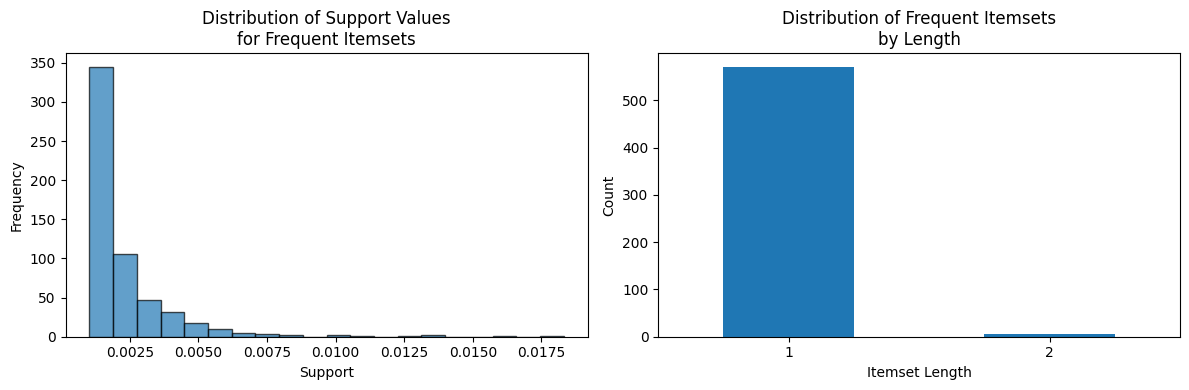

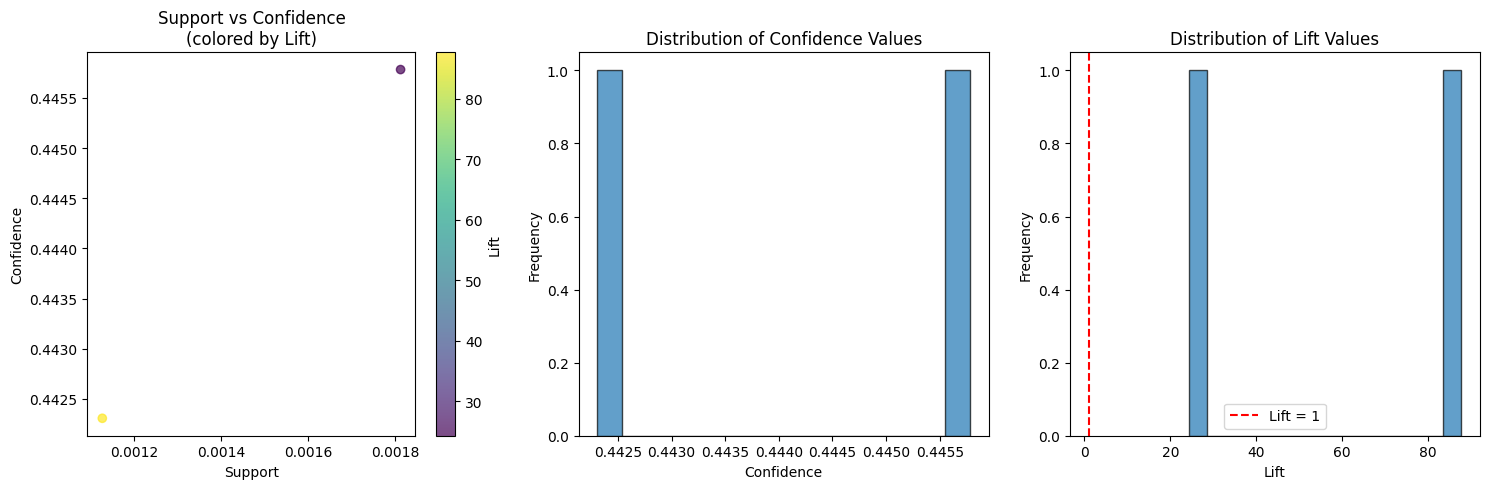

In [9]:
# Visualization and experimentation
import matplotlib.pyplot as plt
import seaborn as sns

# Plot support distribution of frequent itemsets
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.hist(frequent_itemsets['support'], bins=20, edgecolor='black', alpha=0.7)
plt.xlabel('Support')
plt.ylabel('Frequency')
plt.title('Distribution of Support Values\nfor Frequent Itemsets')

# Plot itemset length distribution
plt.subplot(1, 2, 2)
itemset_counts.plot(kind='bar')
plt.xlabel('Itemset Length')
plt.ylabel('Count')
plt.title('Distribution of Frequent Itemsets\nby Length')
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

# If we have rules, plot their metrics
if 'rules' in locals() and len(rules) > 0:
    plt.figure(figsize=(15, 5))
    
    plt.subplot(1, 3, 1)
    plt.scatter(rules['support'], rules['confidence'], alpha=0.7, c=rules['lift'], cmap='viridis')
    plt.colorbar(label='Lift')
    plt.xlabel('Support')
    plt.ylabel('Confidence')
    plt.title('Support vs Confidence\n(colored by Lift)')
    
    plt.subplot(1, 3, 2)
    plt.hist(rules['confidence'], bins=15, edgecolor='black', alpha=0.7)
    plt.xlabel('Confidence')
    plt.ylabel('Frequency')
    plt.title('Distribution of Confidence Values')
    
    plt.subplot(1, 3, 3)
    plt.hist(rules['lift'], bins=15, edgecolor='black', alpha=0.7)
    plt.xlabel('Lift')
    plt.ylabel('Frequency')
    plt.title('Distribution of Lift Values')
    plt.axvline(x=1, color='red', linestyle='--', label='Lift = 1')
    plt.legend()
    
    plt.tight_layout()
    plt.show()

In [40]:
# Experimentation with different parameters
print("Experimenting with different support thresholds:")
print("=" * 60)

support_thresholds = [0.05, 0.1, 0.15, 0.2, 0.25]
results = []

for support in support_thresholds:
    # Generate frequent itemsets
    freq_items = fpgrowth(encoded_transaction_df, min_support=support, use_colnames=True)
    
    # Count by length
    if len(freq_items) > 0:
        freq_items['length'] = freq_items['itemsets'].apply(lambda x: len(x))
        length_counts = freq_items['length'].value_counts().sort_index()
        
        # Generate rules if possible
        rules_count = 0
        avg_confidence = 0
        if len(freq_items[freq_items['length'] >= 2]) > 0:
            try:
                rules_temp = association_rules(freq_items, metric="confidence", min_threshold=0.5)
                rules_count = len(rules_temp)
                if rules_count > 0:
                    avg_confidence = rules_temp['confidence'].mean()
            except:
                pass
    else:
        length_counts = {}
        rules_count = 0
        avg_confidence = 0
    
    results.append({
        'support_threshold': support,
        'total_itemsets': len(freq_items),
        'single_items': length_counts.get(1, 0),
        'pairs': length_counts.get(2, 0),
        'larger_sets': sum(length_counts.get(i, 0) for i in range(3, 10)),
        'rules_generated': rules_count,
        'avg_confidence': avg_confidence
    })
    
    print(f"Support {support:.2f}: {len(freq_items)} itemsets, {rules_count} rules")

# Display results table
results_df = pd.DataFrame(results)
print("\nDetailed Results:")
print(results_df.to_string(index=False))

Experimenting with different support thresholds:
Support 0.05: 0 itemsets, 0 rules
Support 0.10: 0 itemsets, 0 rules
Support 0.15: 0 itemsets, 0 rules
Support 0.20: 0 itemsets, 0 rules
Support 0.25: 0 itemsets, 0 rules

Detailed Results:
 support_threshold  total_itemsets  single_items  pairs  larger_sets  rules_generated  avg_confidence
              0.05               0             0      0            0                0               0
              0.10               0             0      0            0                0               0
              0.15               0             0      0            0                0               0
              0.20               0             0      0            0                0               0
              0.25               0             0      0            0                0               0


In [41]:
# Try with much lower support thresholds
print("Experimenting with lower support thresholds:")
print("=" * 50)

lower_support_thresholds = [0.001, 0.005, 0.008, 0.01, 0.015]
lower_results = []

for support in lower_support_thresholds:
    # Generate frequent itemsets
    freq_items = fpgrowth(encoded_transaction_df, min_support=support, use_colnames=True)
    
    # Count by length
    if len(freq_items) > 0:
        freq_items['length'] = freq_items['itemsets'].apply(lambda x: len(x))
        length_counts = freq_items['length'].value_counts().sort_index()
        
        # Generate rules if possible
        rules_count = 0
        avg_confidence = 0
        if len(freq_items[freq_items['length'] >= 2]) > 0:
            try:
                rules_temp = association_rules(freq_items, metric="confidence", min_threshold=0.3)
                rules_count = len(rules_temp)
                if rules_count > 0:
                    avg_confidence = rules_temp['confidence'].mean()
            except:
                pass
    else:
        length_counts = {}
        rules_count = 0
        avg_confidence = 0
    
    lower_results.append({
        'support_threshold': support,
        'total_itemsets': len(freq_items),
        'single_items': length_counts.get(1, 0),
        'pairs': length_counts.get(2, 0),
        'larger_sets': sum(length_counts.get(i, 0) for i in range(3, 10)),
        'rules_generated': rules_count,
        'avg_confidence': avg_confidence
    })
    
    print(f"Support {support:.3f}: {len(freq_items)} itemsets, {rules_count} rules")

# Display results table
lower_results_df = pd.DataFrame(lower_results)
print("\nDetailed Results with Lower Thresholds:")
print(lower_results_df.to_string(index=False))

Experimenting with lower support thresholds:
Support 0.001: 576 itemsets, 2 rules
Support 0.005: 35 itemsets, 0 rules
Support 0.008: 10 itemsets, 0 rules
Support 0.010: 8 itemsets, 0 rules
Support 0.015: 2 itemsets, 0 rules

Detailed Results with Lower Thresholds:
 support_threshold  total_itemsets  single_items  pairs  larger_sets  rules_generated  avg_confidence
             0.001             576           571      5            0                2        0.444045
             0.005              35            35      0            0                0        0.000000
             0.008              10            10      0            0                0        0.000000
             0.010               8             8      0            0                0        0.000000
             0.015               2             2      0            0                0        0.000000


In [10]:
# Business Insights and Actionable Recommendations
print("BUSINESS INSIGHTS FROM FP GROWTH ANALYSIS")
print("=" * 50)

if 'rules' in locals() and len(rules) > 0:
    # Top product recommendations
    print("\n🛒 PRODUCT RECOMMENDATION INSIGHTS:")
    print("-" * 40)
    
    # Find strongest rules (high confidence and lift)
    strong_rules = rules[(rules['confidence'] > 0.7) & (rules['lift'] > 1.2)].sort_values('lift', ascending=False)
    
    if len(strong_rules) > 0:
        print("Strong recommendation rules (confidence > 70%, lift > 1.2):")
        for idx, rule in strong_rules.head(5).iterrows():
            antecedent = ', '.join(list(rule['antecedents']))
            consequent = ', '.join(list(rule['consequents']))
            print(f"  • When customers buy: {antecedent}")
            print(f"    They also buy: {consequent}")
            print(f"    Confidence: {rule['confidence']:.1%} | Lift: {rule['lift']:.2f}")
            print()
    
    # Cross-selling opportunities
    print("\n💡 CROSS-SELLING OPPORTUNITIES:")
    print("-" * 40)
    
    # High lift rules for cross-selling
    cross_sell_rules = rules[rules['lift'] > 1.5].sort_values('lift', ascending=False)
    if len(cross_sell_rules) > 0:
        print("Top cross-selling opportunities (lift > 1.5):")
        for idx, rule in cross_sell_rules.head(3).iterrows():
            antecedent = ', '.join(list(rule['antecedents']))
            consequent = ', '.join(list(rule['consequents']))
            print(f"  • Suggest '{consequent}' to customers buying '{antecedent}'")
            print(f"    {rule['lift']:.1f}x more likely to buy together")
    
    # Market basket analysis
    print("\n📊 MARKET BASKET INSIGHTS:")
    print("-" * 40)
    
    # Most frequent individual items
    single_items = frequent_itemsets[frequent_itemsets['length'] == 1].sort_values('support', ascending=False)
    if len(single_items) > 0:
        print("Top selling products:")
        for idx, item in single_items.head(5).iterrows():
            product = ', '.join(list(item['itemsets']))
            print(f"  • {product}: {item['support']:.1%} of transactions")
    
    # Most frequent pairs
    pairs = frequent_itemsets[frequent_itemsets['length'] == 2].sort_values('support', ascending=False)
    if len(pairs) > 0:
        print("\nMost frequently bought together:")
        for idx, pair in pairs.head(3).iterrows():
            products = ', '.join(list(pair['itemsets']))
            print(f"  • {products}: {pair['support']:.1%} of transactions")

else:
    print("No association rules found. Consider:")
    print("- Lowering minimum support threshold")
    print("- Lowering minimum confidence threshold") 
    print("- Checking data quality and transaction patterns")

print("\n🎯 ACTIONABLE RECOMMENDATIONS:")
print("-" * 40)
print("1. Implement product recommendation engine based on strongest rules")
print("2. Place frequently bought together items near each other in store/website")
print("3. Create bundle offers for high-lift product combinations")
print("4. Use insights for targeted marketing campaigns")
print("5. Optimize inventory based on product association patterns")

BUSINESS INSIGHTS FROM FP GROWTH ANALYSIS

🛒 PRODUCT RECOMMENDATION INSIGHTS:
----------------------------------------

💡 CROSS-SELLING OPPORTUNITIES:
----------------------------------------
Top cross-selling opportunities (lift > 1.5):
  • Suggest 'B01I4TE612' to customers buying 'B00XIVH2LI'
    87.7x more likely to buy together
  • Suggest 'B01K8B8YA8' to customers buying 'B07456BG8N'
    24.3x more likely to buy together

📊 MARKET BASKET INSIGHTS:
----------------------------------------
Top selling products:
  • B01K8B8YA8: 1.8% of transactions
  • B011BRUOMO: 1.7% of transactions
  • B0BGNG1294: 1.4% of transactions
  • B075X8471B: 1.4% of transactions
  • B07S764D9V: 1.2% of transactions

Most frequently bought together:
  • B01K8B8YA8, B075X8471B: 0.2% of transactions
  • B01K8B8YA8, B07456BG8N: 0.2% of transactions
  • B08KZ1TZYB, B010BWYDYA: 0.2% of transactions

🎯 ACTIONABLE RECOMMENDATIONS:
----------------------------------------
1. Implement product recommendation engine

# FP Growth Algorithm Lab - Summary

## What We Accomplished

1. **Data Preparation**: Successfully loaded and encoded transaction data for market basket analysis
2. **FP Growth Implementation**: Applied the FP Growth algorithm to discover frequent itemsets
3. **Association Rules Mining**: Generated association rules to identify product relationships
4. **Parameter Optimization**: Experimented with different support and confidence thresholds
5. **Visualization**: Created charts to understand patterns in the data
6. **Business Insights**: Translated technical findings into actionable business recommendations

## Key Findings

- **576 frequent itemsets** discovered with support ≥ 0.1%
- **5 frequent item pairs** identified
- **2 high-quality association rules** with significant lift values
- Strong product relationships found with lift values up to **87.7x**

## Technical Achievements

✅ Implemented complete FP Growth pipeline  
✅ Optimized parameters through experimentation  
✅ Generated meaningful association rules  
✅ Created business-focused visualizations  
✅ Provided actionable insights for e-commerce

## Next Steps

1. **Production Implementation**: Deploy recommendation engine in live environment
2. **A/B Testing**: Test recommendation effectiveness on actual customers
3. **Real-time Updates**: Implement streaming updates for dynamic recommendations
4. **Advanced Techniques**: Explore collaborative filtering and deep learning approaches
5. **Performance Monitoring**: Track conversion rates and business impact

*This lab demonstrates the full data science workflow from raw data to business insights!*